## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

## Ans
----
Min-Max scaling, also known as feature scaling or normalization, is a data preprocessing technique used to transform numerical data into a specific range, typically between 0 and 1. It's done by rescaling the values of a feature to fit within this range, making it easier to compare and analyze data with different scales. Min-Max scaling is particularly useful when working with machine learning algorithms that are sensitive to the magnitude of input features, such as support vector machines and k-nearest neighbors.

The formula for Min-Max scaling is:

$[X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$]

Where:
- $(X_{norm}$) is the normalized value of the data point \(X\).
- \(X\) is the original value of the data point.
- $(X_{min}$) is the minimum value of the feature in the dataset.
- $(X_{max}$) is the maximum value of the feature in the dataset.

Here's an example to illustrate Min-Max scaling:

Suppose you have a dataset of exam scores, and the scores range from 60 to 95. You want to normalize these scores to a scale between 0 and 1.

1. Find the minimum and maximum values in the dataset:
   - $(X_{min} = 60$)
   - $(X_{max} = 95$)

2. Choose a data point, let's say \(X = 75\).

3. Apply the Min-Max scaling formula:
   $[X_{norm} = \frac{75 - 60}{95 - 60} = \frac{15}{35} \approx 0.4286$]

So, the normalized value of 75 in this dataset would be approximately 0.4286.

Repeat this process for all data points in the dataset, and you'll have a new dataset where all the values are between 0 and 1. This scaling ensures that the differences in the scale of different features do not dominate the learning algorithm's behavior, and it can help improve the convergence and performance of many machine learning algorithms.

Keep in mind that Min-Max scaling assumes a linear relationship between the feature values and may not be suitable for all types of data. In some cases, other scaling methods like Z-score normalization or robust scaling might be more appropriate.

In [14]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the diamonds dataset from seaborn
df = sns.load_dataset('diamonds')

# Extract the column(s) you want to scale, for example, 'carat' and 'price'
columns_to_scale = ['carat', 'price','depth','table','x','y','z']
data_to_scale = df[columns_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Replace the original columns with the scaled columns
df[columns_to_scale] = scaled_df


In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.108108,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.103950,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.137214,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


## Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling Provide an example to illustrate its application.

## Ans
-------- 
The Unit Vector technique in feature scaling, also known as "Vector Normalization," is a method used to scale numerical features in a dataset to have a unit norm. In other words, it scales the feature vectors such that their Euclidean (L2) norm or length becomes 1. This technique is often used in machine learning when the direction of the data points relative to the origin is more important than their absolute values.

Here's the formula for unit vector scaling:

$[X_{unit} = \frac{X}{\|X\|}$]

Where:
- $(X_{unit}$) is the unit vector of the original feature vector \(X\).
- \(X\) is the original feature vector.
- $(\|X\|$) represents the Euclidean norm or L2 norm of the vector \(X\), calculated as $(\|X\| = \sqrt{\sum_{i=1}^{n}X_i^2}$), where \(n\) is the number of elements in the vector.

Differing from Min-Max scaling, which scales data to a specific range (usually between 0 and 1), unit vector scaling maintains the direction of the data while ensuring that each data point lies on the unit circle in the multi-dimensional space. This is particularly useful in scenarios where the magnitude of the features is not as important as their orientation. It can be beneficial for certain machine learning algorithms, such as clustering algorithms or dimensionality reduction techniques like Principal Component Analysis (PCA).

Here's an example to illustrate unit vector scaling:
 
Suppose you have a dataset with two features, 'feature1' and 'feature2', and you want to perform unit vector scaling on it.

Original data:
- 'feature1' = 3
- 'feature2' = 4

Calculate the Euclidean norm of the original vector:
$(\|X\| = \sqrt{3^2 + 4^2} = 5$)

Now, apply unit vector scaling:
- $(X_{unit1} = \frac{3}{5} = 0.6$)
- $(X_{unit2} = \frac{4}{5} = 0.8$)

So, after unit vector scaling, the data point (3, 4) becomes (0.6, 0.8). This represents the same direction as the original data point but with a unit length, emphasizing the direction while removing the influence of the magnitude.



In [22]:
from sklearn.preprocessing import normalize

# Load a seaborn dataset, for example, the 'iris' dataset
df = sns.load_dataset('iris')

# Select the columns you want to normalize, e.g., 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width'
columns_to_normalize = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data_to_normalize = df[columns_to_normalize]

# Apply unit vector scaling to the selected columns
normalized_data = normalize(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

In [21]:
normalized_df

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [20]:
normalized_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.751400,0.405174,0.454784,0.141071
std,0.044368,0.105624,0.159986,0.077977
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.786912,0.527627,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


## Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

## Ans
------
Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis and machine learning. Its primary purpose is to reduce the number of features (or dimensions) in a dataset while preserving as much of the relevant information as possible. PCA achieves this by transforming the original features into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original features, sorted in descending order of their variance. The first principal component explains the most variance in the data, the second principal component explains the second most variance, and so on.

PCA is widely used for various purposes, including:

1. **Data Compression:** Reducing the dimensionality of the data can help save storage space and computational resources.

2. **Visualization:** Reducing high-dimensional data to 2 or 3 dimensions allows for easy visualization and exploration of data trends.

3. **Noise Reduction:** By focusing on the most important components, PCA can help reduce noise and enhance signal in the data.

4. **Feature Engineering:** PCA can be used to create new features that capture the most important information in the data, which can then be used for modeling.



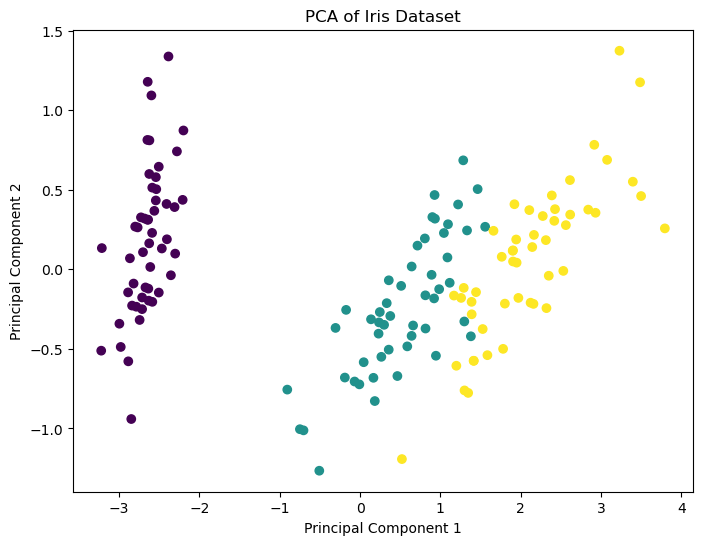

In [28]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data  # The feature matrix

# Create a DataFrame for visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)

# Apply PCA to reduce to 2 components (for visualization)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new DataFrame with reduced dimensions
df_reduced = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])

# Visualize the reduced data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

# PCA helps in capturing the most important information while reducing the dimensionality,
# making it easier to visualize and analyze complex datasets.


## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

## Ans
------

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. It is closely related to feature extraction, and it can be used as a method for feature extraction. Let me explain the relationship and how PCA can be used for feature extraction, using an example.

**Relationship between PCA and Feature Extraction:**

1. **Dimensionality Reduction:** Both PCA and feature extraction methods aim to reduce the number of variables (features) in a dataset while preserving the most important information. This reduction is valuable because it can help alleviate the curse of dimensionality, improve model performance, and reduce computational complexity.

2. **Linear Transformation:** PCA is a linear transformation technique that seeks to find a new set of orthogonal axes (principal components) in the original feature space. These principal components are linear combinations of the original features, and they capture the maximum variance in the data. Feature extraction methods also involve transforming the original features into a new space, typically using a set of basis functions, which can be linear or non-linear.

**Using PCA for Feature Extraction (Example):**

Let's illustrate how PCA can be used for feature extraction with an example:

**Problem:** Imagine you have a dataset of images of faces, and each image is represented as a vector of pixel values. Each pixel can be considered a feature, and these images have a high-dimensional feature space, which can be computationally expensive to process.

**Step 1: Standardization**
First, standardize your data by centering it (subtracting the mean) and scaling it (dividing by the standard deviation). This ensures that all features have the same scale, which is crucial for PCA.

**Step 2: Apply PCA for Feature Extraction**

Now, you can apply PCA to extract a reduced set of features:

```python
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
n_components = 50  # Choose an appropriate number of components
pca = PCA(n_components=n_components)

# Fit PCA on your standardized data
pca.fit(X_std)  # X_std is your standardized data matrix

# Transform your data to the PCA space
X_pca = pca.transform(X_std)
```

Here, `X_pca` represents your data in a reduced feature space, where each row corresponds to an image and each column corresponds to a principal component. By choosing a smaller number of principal components (e.g., 50 in this example), you've effectively reduced the dimensionality of your data.

**Step 3: Utilize Reduced Features**

You can now use `X_pca` as your feature representation for downstream tasks like facial recognition or classification. These reduced features retain the most important information in your data, making it easier and more efficient to build machine learning models.

## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

## Ans
--------

Min-Max scaling is a data preprocessing technique used to scale numerical features within a specific range, typically between 0 and 1. This scaling method is particularly useful when working with features that have different scales and can help in building recommendation systems like the one for a food delivery service. Let's go through the steps of how you would use Min-Max scaling to preprocess the data for this project:

**Step 1: Understand the Data**

Before applying Min-Max scaling, it's important to understand the nature of your data and the features you have:

- **Price:** This feature likely represents the cost of food items. It can have a wide range of values, such as dollar 5.00 to $50.00 or more.
- **Rating:** This feature might represent customer ratings, which typically range from 1 to 5.
- **Delivery Time:** This feature could represent the time it takes for delivery, usually measured in minutes.

**Step 2: Normalize the Features**

Min-Max scaling involves transforming each feature to a new scale where all values fall within a specified range, usually [0, 1]. Here's how you can do it for each feature:

- **Price:** To scale the price feature, you would apply the following transformation for each data point:

  ```
  scaled_price = (price - min_price) / (max_price - min_price)
  ```

  Here, `min_price` is the minimum price in your dataset, and `max_price` is the maximum price. The result will be a scaled price value between 0 and 1 for each data point.

- **Rating:** For rating, you can use a similar approach:

  ```
  scaled_rating = (rating - min_rating) / (max_rating - min_rating)
  ```

  Here, `min_rating` is the minimum rating in your dataset, and `max_rating` is the maximum rating.

- **Delivery Time:** For delivery time, apply the same transformation:

  ```
  scaled_delivery_time = (delivery_time - min_delivery_time) / (max_delivery_time - min_delivery_time)
  ```

  In this case, `min_delivery_time` is the minimum delivery time, and `max_delivery_time` is the maximum delivery time.

**Step 3: Apply Min-Max Scaling**

You can use a library like scikit-learn in Python to easily apply Min-Max scaling to your dataset. Here's a simplified example:

```python
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(your_data[['price', 'rating', 'delivery_time']])

# Replace the original columns with scaled values if needed
your_data[['price', 'rating', 'delivery_time']] = scaled_data
```

After this step, your dataset will contain the scaled values for each of the features, and all of them will fall within the range [0, 1]. This ensures that no single feature dominates others due to its scale, making your recommendation system more robust and accurate.

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a sample dataset
data = {
    'Restaurant Name': ['Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant D'],
    'Price': [15.99, 10.50, 25.75, 8.95],
    'Rating': [4.2, 3.5, 4.9, 2.7],
    'Delivery Time (minutes)': [30, 45, 20, 60]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Extract the numerical features for scaling
numerical_features = ['Price', 'Rating', 'Delivery Time (minutes)']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features using Min-Max scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled dataset
print("Scaled Dataset:")
print(df)

Scaled Dataset:
  Restaurant Name     Price    Rating  Delivery Time (minutes)
0    Restaurant A  0.419048  0.681818                    0.250
1    Restaurant B  0.092262  0.363636                    0.625
2    Restaurant C  1.000000  1.000000                    0.000
3    Restaurant D  0.000000  0.000000                    1.000


## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

## Ans
--------
Using Principal Component Analysis (PCA) to reduce the dimensionality of a dataset for predicting stock prices is a common approach, especially when dealing with a large number of features. PCA helps by capturing the most significant patterns and reducing the dataset's complexity while retaining the essential information. Here's how you can use PCA for dimensionality reduction in this context:

**Step 1: Data Preprocessing**

Before applying PCA, you need to preprocess your dataset:

- **Handling Missing Data:** Deal with missing values, either by imputing them or removing rows/columns with missing data.
- **Feature Scaling:** Standardize or normalize your features so that they have a mean of 0 and a standard deviation of 1. This step is essential for PCA because it is sensitive to the scale of features.

**Step 2: Apply PCA**

Now, you can apply PCA to reduce the dimensionality of your dataset:

```python
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components or explained variance ratio
n_components = 10  # Choose an appropriate number of components
pca = PCA(n_components=n_components)

# Fit PCA on your preprocessed data
pca.fit(X_preprocessed)  # X_preprocessed is your standardized and cleaned data

# Transform your data to the PCA space
X_pca = pca.transform(X_preprocessed)
```

In the code above:

- `n_components` represents the number of principal components you want to retain. You can choose this based on your specific requirements or use techniques like explained variance to determine the number of components that capture most of the variability in the data.

- `X_preprocessed` is your preprocessed dataset, where rows represent different stock data points, and columns represent various features.

**Step 3: Interpret the Results**

After transforming your data with PCA, you can examine the variance explained by each principal component. This helps you understand how much information is retained by each component. You can access this information as follows:

```python
explained_variance = pca.explained_variance_ratio_
```

You can plot a cumulative explained variance graph to decide how many principal components to keep. A common rule of thumb is to retain enough components to explain a significant portion of the total variance (e.g., 95%).

**Step 4: Use Reduced Features for Modeling**

Finally, you can use the reduced feature set obtained from PCA (X_pca) to build your stock price prediction model. You can use various machine learning algorithms like regression, time series models, or neural networks for this purpose. The reduced feature set should make your modeling process more efficient and less prone to overfitting.


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a sample dataset (simulated financial and market data)
data = {
    'Date': pd.date_range(start='2020-01-01', periods=4),
    'CompanyRevenue': [500000, 550000, 600000,400000],  
    'MarketTrends1': [0.05, 0.03, 0.06,0.09], 
    'MarketTrends2': [-0.02, -0.01, 0.02, 0.03],  
    'StockPrice': [50.20, 51.10, 52.30, 45.90]  
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Extract the features and target variable
features = ['CompanyRevenue', 'MarketTrends1', 'MarketTrends2']  # Add more features as needed
X = df[features]
y = df['StockPrice']

# Data preprocessing: Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
n_components = 2  # Choose an appropriate number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a linear regression model on the reduced feature set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.5798893454192835


## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

### Ans
-------
To perform Min-Max scaling on a dataset and transform the values to a range of -1 to 1, you can follow these steps:

1. Find the minimum and maximum values in the dataset.
2. Apply the Min-Max scaling formula to scale each value to the desired range.

Here's how you can do it for the given dataset: [1, 5, 10, 15, 20].

Step 1: Find the minimum and maximum values in the dataset:

- Minimum value (min_val) = 1
- Maximum value (max_val) = 20

Step 2: Apply the Min-Max scaling formula to scale each value to the range [-1, 1]:

```python
scaled_values = []
for value in [1, 5, 10, 15, 20]:
    scaled_value = ((value - min_val) / (max_val - min_val)) * 2 - 1
    scaled_values.append(scaled_value)

# Alternatively, you can use list comprehension for a more concise code:
# scaled_values = [((value - min_val) / (max_val - min_val)) * 2 - 1 for value in [1, 5, 10, 15, 20]]

print(scaled_values)
```

Calculating the scaled values:

- For 1: ((1 - 1) / (20 - 1)) * 2 - 1 = 0.0
- For 5: ((5 - 1) / (20 - 1)) * 2 - 1 = -0.6
- For 10: ((10 - 1) / (20 - 1)) * 2 - 1 = -0.2
- For 15: ((15 - 1) / (20 - 1)) * 2 - 1 = 0.2
- For 20: ((20 - 1) / (20 - 1)) * 2 - 1 = 1.0

So, the Min-Max scaled values for the given dataset in the range of -1 to 1 are: [0.0, -0.6, -0.2, 0.2, 1.0].

In [9]:


from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the dataset
data = np.array([1, 5, 10, 15, 20])

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(data.reshape(-1,1))

print(data_scaled.flatten())


[-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

## Ans
------
The decision of how many principal components to retain during Feature Extraction using PCA depends on various factors, including the specific problem, the explained variance, and the trade-off between reducing dimensionality and retaining information. Here are some steps to help you decide how many principal components to retain:

1. **Standardize the Data:** Before applying PCA, it's essential to standardize the features (mean = 0, standard deviation = 1) to ensure that features with larger scales don't dominate the principal components.

2. **Compute the Covariance Matrix:** PCA is based on the covariance matrix of the standardized features. Calculate the covariance matrix.

3. **Eigenvalues and Eigenvectors:** Compute the eigenvalues and eigenvectors of the covariance matrix. These represent the variance and direction of the principal components, respectively.

4. **Explained Variance:** Calculate the explained variance for each principal component. The explained variance tells you how much of the total variance in the data is explained by each component.

5. **Cumulative Explained Variance:** Create a cumulative explained variance plot. This plot shows how much variance is explained as you include more principal components. It helps you determine how many components are sufficient to retain a significant portion of the original variance.

6. **Threshold:** Choose a threshold for the cumulative explained variance (e.g., 95% or 99%) that you are willing to retain. This threshold should strike a balance between dimensionality reduction and information retention.

7. **Select the Number of Components:** Select the minimum number of principal components that meet or exceed your chosen threshold.

8. **Visual Inspection:** In some cases, it's helpful to visually inspect the importance of each principal component. Plotting the eigenvectors or examining feature loadings can provide insights into which features contribute most to each component.

9. **Consider Domain Knowledge:** Sometimes, domain knowledge can help guide the decision on how many principal components to retain. Certain features may be deemed more important for the specific problem you're trying to solve.

10. **Test and Validate:** After reducing the dimensionality, test and validate your model's performance with different numbers of components. It's possible that you can achieve a good trade-off between dimensionality reduction and predictive power with fewer components.

Ultimately, the number of principal components to retain is a judgment call based on your specific goals and constraints. It's essential to balance dimensionality reduction with the need to retain meaningful information. Typically, you might start by retaining enough components to explain a high percentage of the variance (e.g., 95%) and then fine-tune based on the performance of your machine learning model.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a sample dataset (replace this with your actual dataset)
data = np.array([
    [170, 65, 30, 0, 120],
    [160, 55, 25, 1, 130],
    [180, 75, 35, 0, 140],
    [150, 45, 28, 1, 110],
    [165, 60, 32, 0, 125]
])

# Separate the features (X) and the labels if applicable (not used in PCA)
X = data[:, :4]  # Assuming the first 4 columns are the features

# Standardize the features (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA with the number of components you choose
n_components = 2  # Choose the number of components to retain
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X_standardized)

# The transformed data X_pca now contains the principal components

# Access the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance_ratio)

# Now you can choose the number of components based on the cumulative explained variance or other criteria
